# 时间序列

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
import datetime as dt
from dateutil.parser import parse

In [2]:
stamp=dt.datetime(2011,1,3)
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [5]:
datestrs=['7/6/2011','8/6/2011']
[dt.datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [8]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [9]:
parse('6/12/2011')  #默认是月份在前

datetime.datetime(2011, 6, 12, 0, 0)

In [10]:
parse('6/12/2011',dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [11]:
dates=pd.date_range('1/1/2000',periods=100,freq='W-WED')
long_df=pd.DataFrame(np.random.randn(100,4),index=dates,columns=['C','T','N','O'])
long_df.loc['5-2001']

,C,T,N,O
2001-05-02,0.158680,-0.236996,0.282359,0.443463
2001-05-09,-1.533875,-1.475921,2.222004,-1.803900
2001-05-16,-0.389496,2.100018,-0.974054,0.595579
2001-05-23,-1.445686,-0.808932,-0.340781,0.776138
2001-05-30,0.211425,0.269537,0.762605,-0.350807


In [2]:
index=pd.date_range(start='4/1/2012',periods=20)

In [3]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [8]:
pd.date_range('4/9/2017',periods=30,freq='W-TUE')

DatetimeIndex(['2017-04-11', '2017-04-18', '2017-04-25', '2017-05-02',
               '2017-05-09', '2017-05-16', '2017-05-23', '2017-05-30',
               '2017-06-06', '2017-06-13', '2017-06-20', '2017-06-27',
               '2017-07-04', '2017-07-11', '2017-07-18', '2017-07-25',
               '2017-08-01', '2017-08-08', '2017-08-15', '2017-08-22',
               '2017-08-29', '2017-09-05', '2017-09-12', '2017-09-19',
               '2017-09-26', '2017-10-03', '2017-10-10', '2017-10-17',
               '2017-10-24', '2017-10-31'],
              dtype='datetime64[ns]', freq='W-TUE')

In [10]:
pd.date_range('1/1/2000','12/1/2000',freq='BM')  #BM每月最后一个工作日

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [11]:
pd.date_range?

In [13]:
pd.date_range('1/1/2018',periods=3,freq='MS')   #BMS 每月第一个工作日  MS：每月第一个日历日

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01'], dtype='datetime64[ns]', freq='MS')

In [18]:
pd.date_range('12/31/2017',periods=13,freq='WOM-1WED')   #每月第一个星期三, 见P325

DatetimeIndex(['2018-01-03', '2018-02-07', '2018-03-07', '2018-04-04',
               '2018-05-02', '2018-06-06', '2018-07-04', '2018-08-01',
               '2018-09-05', '2018-10-03', '2018-11-07', '2018-12-05',
               '2019-01-02'],
              dtype='datetime64[ns]', freq='WOM-1WED')

In [21]:
ts=pd.Series(randn(4),index=pd.date_range('1/1/2000',periods=4,freq='M'))
ts

2000-01-31   -0.594995
2000-02-29    0.616695
2000-03-31    1.140952
2000-04-30    0.409137
Freq: M, dtype: float64

In [22]:
ts/ts.shift(1)-1   #ts.shift(1)是改变数据的位移

2000-01-31         NaN
2000-02-29   -2.036472
2000-03-31    0.850108
2000-04-30   -0.641408
Freq: M, dtype: float64

In [23]:
ts.pct_change()

2000-01-31         NaN
2000-02-29   -2.036472
2000-03-31    0.850108
2000-04-30   -0.641408
Freq: M, dtype: float64

In [24]:
ts.shift(2,freq='M')   #改变目录的操作，不会对数据产生影响

2000-03-31   -0.594995
2000-04-30    0.616695
2000-05-31    1.140952
2000-06-30    0.409137
Freq: M, dtype: float64

In [25]:
ts.shift(3,freq='D')

2000-02-03   -0.594995
2000-03-03    0.616695
2000-04-03    1.140952
2000-05-03    0.409137
dtype: float64

In [28]:
from pandas.tseries.offsets import Day,MonthEnd
offset=MonthEnd()
ts1=pd.Series(randn(20),index=pd.date_range('1/15/2000',periods=20,freq='4d'))
ts1.groupby(offset.rollforward).mean()   #巧妙实现分组

2000-01-31    0.240956
2000-02-29   -0.083210
2000-03-31    0.145432
dtype: float64

Timestamp('2000-01-31 00:00:00')

# 时期及其算术运算

In [34]:
p=pd.Period(2007,freq='A-DEC')   #以DEC的最后一个日历日作为年的分界，在之前是这一年，在之后是后一年
p

Period('2007', 'A-DEC')

In [36]:
pd.period_range('1/1/2012','6/30/2012',freq='M')

PeriodIndex(['2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06'], dtype='period[M]', freq='M')

In [37]:
#由低频率向高频率转变
p=pd.Period('2007',freq='A-JUN')
p.asfreq('M','start')

Period('2006-07', 'M')

In [38]:
p.asfreq('M','end')

Period('2007-06', 'M')

In [39]:
#由高频率向低频率改变   高频率一个单位内所包含元素少，低频率一个单位内所包含元素多
p=pd.Period('2007-08','M')
p.asfreq('A-JUN')    #'A-JUN是以一年作为一个单位

Period('2008', 'A-JUN')

In [40]:
p=pd.Period('2012Q4',freq='Q-JAN')   #2012Q4是季度的表示方法
p

Period('2012Q4', 'Q-JAN')

In [41]:
p.asfreq('D','start')

Period('2011-11-01', 'D')

In [42]:
p.asfreq('M','end')

Period('2012-01', 'M')

#### 获取该季度倒数第二个工作日下午4点的时间戳

In [44]:
p4pm=(p.asfreq('B','end')-1).asfreq('T','start')+16*60  # T是分
p4pm

Period('2012-01-30 16:00', 'T')

In [45]:
rng=pd.period_range('2011Q3','2012Q4',freq='Q-JAN')
rng

PeriodIndex(['2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4'], dtype='period[Q-JAN]', freq='Q-JAN')

In [46]:
new_rng=(rng.asfreq('B','e')-1).asfreq('T','s')+16*60
new_rng.to_timestamp()

DatetimeIndex(['2010-10-28 16:00:00', '2011-01-28 16:00:00',
               '2011-04-28 16:00:00', '2011-07-28 16:00:00',
               '2011-10-28 16:00:00', '2012-01-30 16:00:00'],
              dtype='datetime64[ns]', freq=None)

In [60]:
ts1=pd.Series(randn(20),index=pd.date_range('1/15/2000',periods=20,freq='4d'))
ts2=ts1.groupby(lambda x : x.month)
ts2.size()

1    5
2    7
3    8
dtype: int64

In [63]:
ts1=pd.Series(randn(8),index=pd.date_range('1/15/2000',periods=8,freq='4d'))
ts1.to_period('M')

2000-01    0.091077
2000-01   -0.308168
2000-01   -1.449831
2000-01   -0.384906
2000-01   -0.589155
2000-02    1.523501
2000-02   -0.531356
2000-02    2.560229
Freq: M, dtype: float64

### 重采样及频率转换 resample

In [38]:
rng=pd.date_range('1/1/2000',periods=100,freq='D')
ts=pd.Series(randn(len(rng)),index=rng)
ts.resample('M').mean()

2000-01-31   -0.042344
2000-02-29    0.168130
2000-03-31    0.078588
2000-04-30   -0.495532
Freq: M, dtype: float64

In [40]:
ts.resample('M').ffill()    #要是不 .mean()，直接取的是当月日期对应的数，还得点ffill()之后才能显示出来

2000-01-31   -1.082746
2000-02-29   -0.575904
2000-03-31    0.024076
2000-04-30   -0.179489
Freq: M, dtype: float64

In [67]:
ts.resample('M',kind='period').size()

2000-01    31
2000-02    29
2000-03    31
2000-04     9
Freq: M, dtype: int64

In [69]:
ts.resample('M',kind='period').ohlc()

,open,high,low,close
2000-01,1.925746,2.381181,-1.964398,-1.092413
2000-02,-1.855909,1.447461,-1.855909,0.135771
2000-03,1.404140,1.592413,-1.737016,-1.037052
2000-04,0.758722,1.668503,-2.358906,-2.358906


In [71]:
ts.resample?

## 时间序列绘图

In [37]:
close_px_all=pd.read_csv('pydata-book-2nd-edition/examples/stock_px.csv',
                     parse_dates=True,index_col=0)   #读入日期的重要方式
close_px=close_px_all[['AAPL','MSFT','XOM']]
close_px.head()

,AAPL,MSFT,XOM
1990-02-01,7.86,0.51,6.12
1990-02-02,8.00,0.51,6.24
1990-02-05,8.18,0.51,6.25
1990-02-06,8.12,0.51,6.23
1990-02-07,7.77,0.51,6.33


In [13]:
close_px_re=close_px.resample('B').ffill()   #resample之后画图就只画工作日的图，即非工作日连横坐标都没有了
#若没有resample画图，则画出的图的横坐标有非工作日

<IPython.core.display.Javascript object>


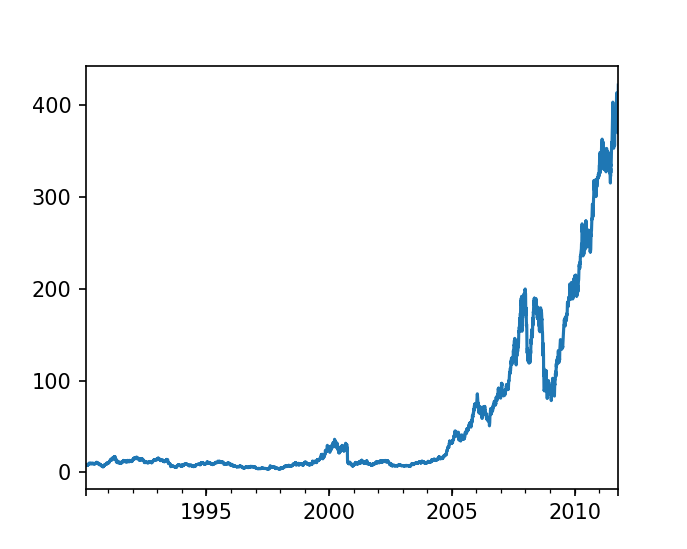

In [14]:
import matplotlib.pyplot as plt
%matplotlib notebook
close_px_re['AAPL'].plot()

<IPython.core.display.Javascript object>


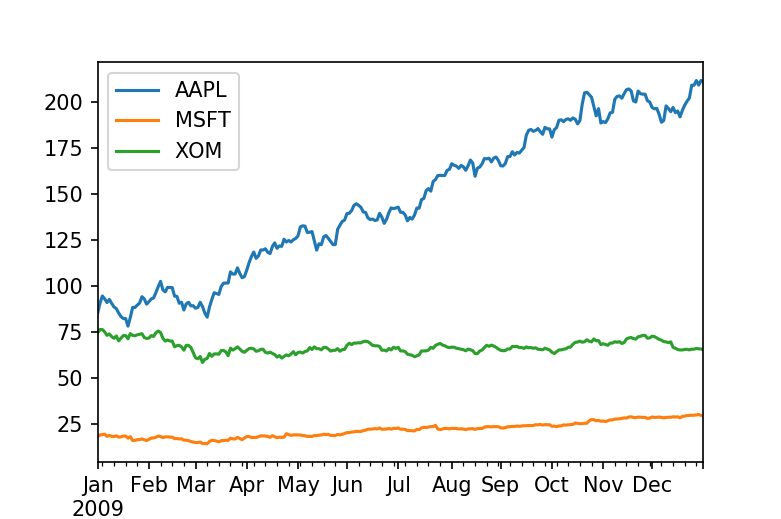

In [16]:
close_px_re.loc['2009'].plot()

<IPython.core.display.Javascript object>


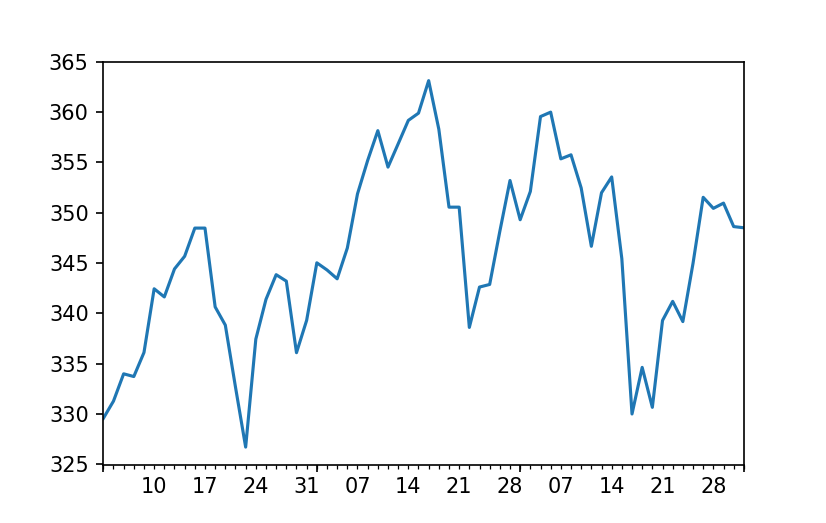

In [17]:
close_px_re['AAPL'].loc['01-2011':'03-2011'].plot()

<IPython.core.display.Javascript object>


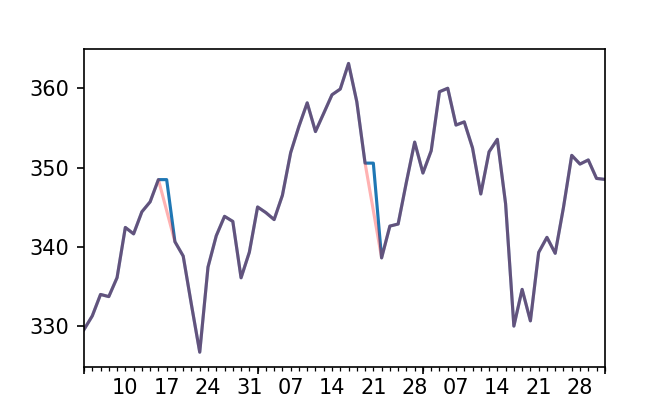

In [28]:
close_px_re['AAPL'].loc['01-2011':'03-2011'].plot()
close_px['AAPL'].loc['01-2011':'03-2011'].plot(color='red',alpha=0.3)

In [42]:
appl_y=close_px['AAPL'].resample('A-DEC',kind='period').mean()
appl_y

1990      8.889177
1991     12.469170
1992     13.130669
1993      9.920395
1994      8.369881
1995     10.075198
1996      6.229882
1997      4.491818
1998      7.641667
1999     14.443214
2000     22.856230
2001     10.109758
2002      9.569921
2003      9.272619
2004     17.763889
2005     46.675952
2006     70.810637
2007    128.273904
2008    141.979012
2009    146.814127
2010    259.842460
2011    356.526834
Freq: A-DEC, Name: AAPL, dtype: float64

In [47]:
appl_y=close_px['AAPL'].resample('A-DEC').ffill()   #取的是当年的最后一个值
appl_y

1990-12-31     10.17
1991-12-31     13.46
1992-12-31     14.39
1993-12-31      7.13
1994-12-31      9.64
1995-12-31      7.97
1996-12-31      5.22
1997-12-31      3.28
1998-12-31     10.23
1999-12-31     25.70
2000-12-31      7.44
2001-12-31     10.95
2002-12-31      7.16
2003-12-31     10.69
2004-12-31     32.20
2005-12-31     71.89
2006-12-31     84.84
2007-12-31    198.08
2008-12-31     85.35
2009-12-31    210.73
2010-12-31    322.56
2011-12-31    422.00
Freq: A-DEC, Name: AAPL, dtype: float64

<IPython.core.display.Javascript object>


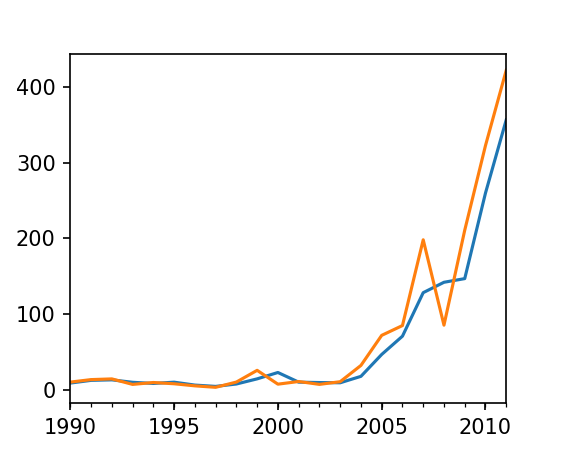

In [45]:
appl_y.plot()